<a href="https://colab.research.google.com/github/leoxiang66/machine-learning/blob/MLO/homework/homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np

# p2.2
$$
f(\mathbf{x})=\|\mathbf{x}-\mathbf{b}\|_2
$$

In [2]:
from typing import Union
def gradient_descent(learning_rate: Union[float, callable,int], x: torch.Tensor, gradient_func: callable,iteration: int = 1):
    tmp = x
    if isinstance(learning_rate, (float,int)):
        for k in range(iteration):
            grad = gradient_func(tmp)
            tmp = tmp - learning_rate * grad
    else:
        pass
    return tmp

In [3]:
b = torch.Tensor([4.5,6])
b

tensor([4.5000, 6.0000])

In [4]:
def gradient_function(x: torch.Tensor):
    b = torch.Tensor([4.5,6])
    return (x-b)/torch.linalg.norm(x-b)

In [5]:
x0 = torch.zeros(1,2)
x0

tensor([[0., 0.]])

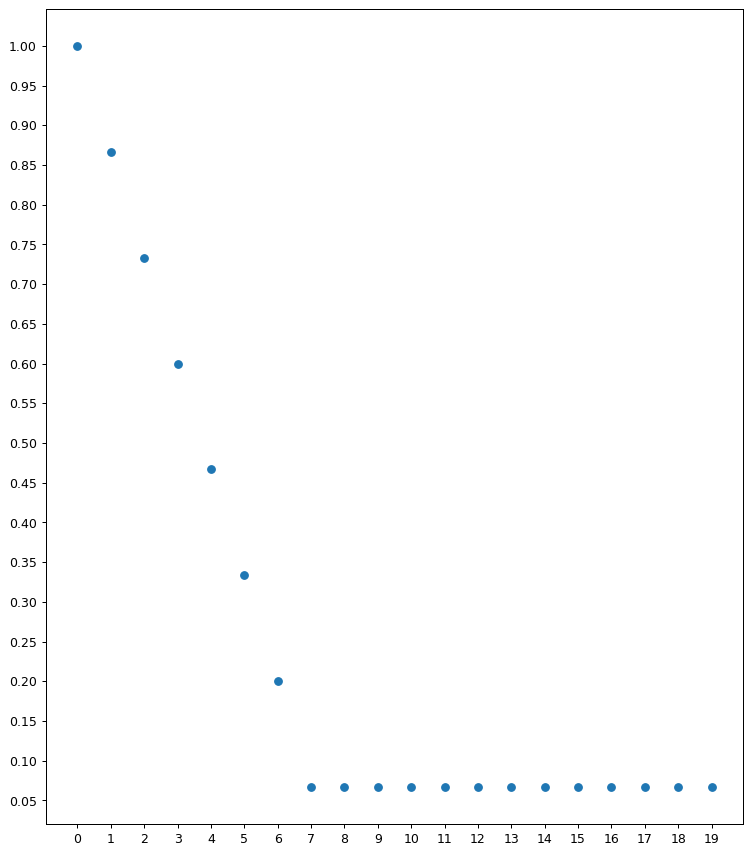

In [6]:
xk = x0
lr = 1
epoch = 20


dist = []

for i in range(epoch):
    dist.append(torch.linalg.norm(b-xk)/torch.linalg.norm(b))
    xk = gradient_descent(lr,xk,gradient_function)




xpoints = range(epoch)
ypoints = dist

x_major_locator=MultipleLocator(1) 
y_major_locator=MultipleLocator(0.05) 

plt.figure(figsize=(10,12),dpi=90)
ax=plt.gca() 
ax.xaxis.set_major_locator(x_major_locator) 
ax.yaxis.set_major_locator(y_major_locator) 



plt.scatter(x=xpoints,y=dist)
plt.show()

In [7]:
print(dist[3:6])

[tensor(0.6000), tensor(0.4667), tensor(0.3333)]


In [8]:
np.argmin(dist), np.min(dist)

(7, 0.06666664)

As we can see, for stepsize = 1, the distance between $x^{k}$ and $x^*$ does not converge to optimal solution. 

# p2.3

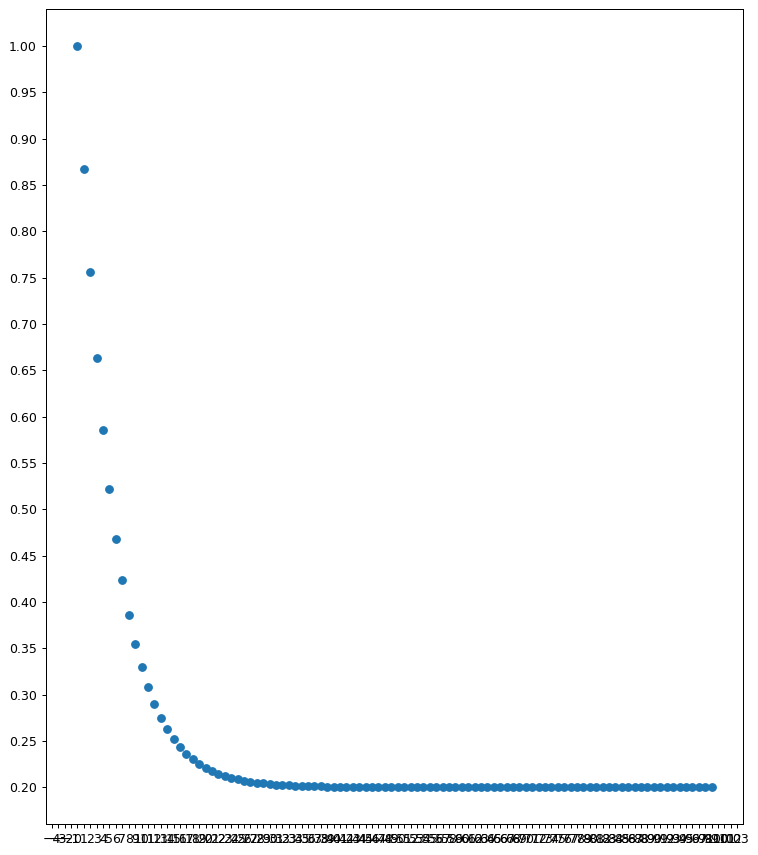

In [9]:
xk = x0
lr = lambda k: (5/6)**k
epoch = 100


dist = []

for i in range(epoch):
    dist.append(torch.linalg.norm(b-xk)/torch.linalg.norm(b))
    xk = gradient_descent(lr(i),xk,gradient_function)



xpoints = range(epoch)
ypoints = dist

x_major_locator=MultipleLocator(1) 
y_major_locator=MultipleLocator(0.05) 

plt.figure(figsize=(10,12),dpi=90)
ax=plt.gca() 
ax.xaxis.set_major_locator(x_major_locator) 
ax.yaxis.set_major_locator(y_major_locator) 



plt.scatter(x=xpoints,y=dist)
plt.show()

In [10]:
dist[6:]

[tensor(0.4679),
 tensor(0.4233),
 tensor(0.3861),
 tensor(0.3550),
 tensor(0.3292),
 tensor(0.3077),
 tensor(0.2897),
 tensor(0.2748),
 tensor(0.2623),
 tensor(0.2519),
 tensor(0.2433),
 tensor(0.2361),
 tensor(0.2300),
 tensor(0.2250),
 tensor(0.2209),
 tensor(0.2174),
 tensor(0.2145),
 tensor(0.2121),
 tensor(0.2101),
 tensor(0.2084),
 tensor(0.2070),
 tensor(0.2058),
 tensor(0.2049),
 tensor(0.2040),
 tensor(0.2034),
 tensor(0.2028),
 tensor(0.2023),
 tensor(0.2020),
 tensor(0.2016),
 tensor(0.2014),
 tensor(0.2011),
 tensor(0.2009),
 tensor(0.2008),
 tensor(0.2007),
 tensor(0.2005),
 tensor(0.2005),
 tensor(0.2004),
 tensor(0.2003),
 tensor(0.2003),
 tensor(0.2002),
 tensor(0.2002),
 tensor(0.2002),
 tensor(0.2001),
 tensor(0.2001),
 tensor(0.2001),
 tensor(0.2001),
 tensor(0.2001),
 tensor(0.2001),
 tensor(0.2000),
 tensor(0.2000),
 tensor(0.2000),
 tensor(0.2000),
 tensor(0.2000),
 tensor(0.2000),
 tensor(0.2000),
 tensor(0.2000),
 tensor(0.2000),
 tensor(0.2000),
 tensor(0.2000

In [11]:
np.argmin(dist), np.min(dist)

(85, 0.20000027)

As we can see, for stepsize = $(5/6)^k$ the distance does not converge to the optimal solution.

# p2.4

the distance is firstly smaller than 0.01 at k = 942


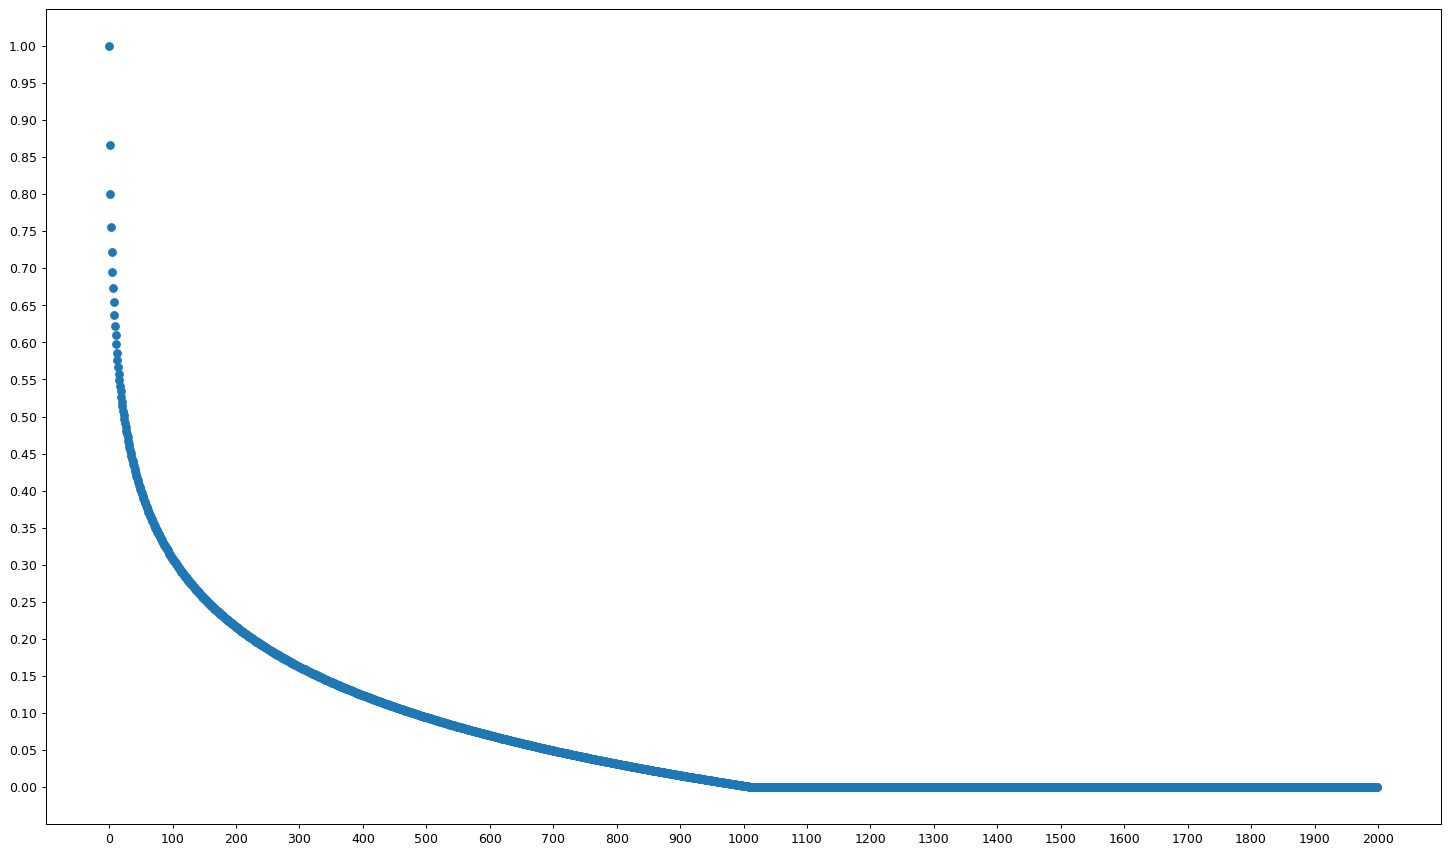

In [12]:
xk = x0
lr = lambda k: 1/(k+1)
epoch = 2000
found = False

dist = []

for i in range(epoch):
    tmp = torch.linalg.norm(b-xk)/torch.linalg.norm(b)
    dist.append(tmp)
    xk = gradient_descent(lr(i),xk,gradient_function)
    if not found and tmp <= 0.01:
        print(f'the distance is firstly smaller than 0.01 at k = {i}')
        found = True



xpoints = range(len(dist))
ypoints = dist

x_major_locator=MultipleLocator(100) 
y_major_locator=MultipleLocator(0.05) 

plt.figure(figsize=(20,12),dpi=90)
ax=plt.gca() 
ax.xaxis.set_major_locator(x_major_locator) 
ax.yaxis.set_major_locator(y_major_locator) 



plt.scatter(x=xpoints,y=dist)
plt.show()

In [13]:
dist[-1]

tensor(1.4755e-05)

As we can see, for learning rate = $1 /(k+1)$, the distance is firstly smaller than 0.01 at $k = 942$. And it also converges to the optimal solution.

# p2.5

$$
g(\mathbf{x})=\|\mathbf{x}-\mathbf{b}\|_2^2
$$

In [14]:
def gradient_function(x: torch.Tensor):
    b = torch.Tensor([4.5,6])
    return 2*(x-b)

the distance is firstly smaller than 0.01 at k = 21


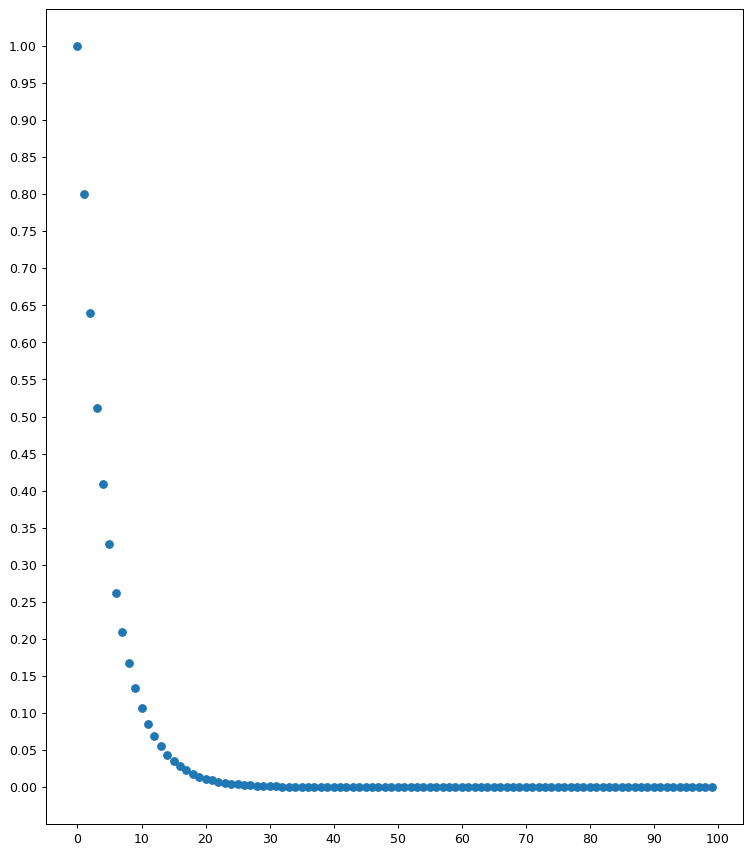

In [15]:
xk = x0
lr = 0.1
epoch = 100
found = False

dist = []

for i in range(epoch):
    tmp = torch.linalg.norm(b-xk)/torch.linalg.norm(b)
    dist.append(tmp)
    xk = gradient_descent(lr,xk,gradient_function)
    if not found and tmp <= 0.01:
        print(f'the distance is firstly smaller than 0.01 at k = {i}')
        found = True



xpoints = range(len(dist))
ypoints = dist

x_major_locator=MultipleLocator(10) 
y_major_locator=MultipleLocator(0.05) 

plt.figure(figsize=(10,12),dpi=90)
ax=plt.gca() 
ax.xaxis.set_major_locator(x_major_locator) 
ax.yaxis.set_major_locator(y_major_locator) 



plt.scatter(x=xpoints,y=dist)
plt.show()

In [16]:
dist[-1]

tensor(1.7983e-07)

As we can see, for learning rate = 0.1, the distance is firstly smaller than 0.01 at $k = 21$. And it also converges to the optimal solution.

# p2.6

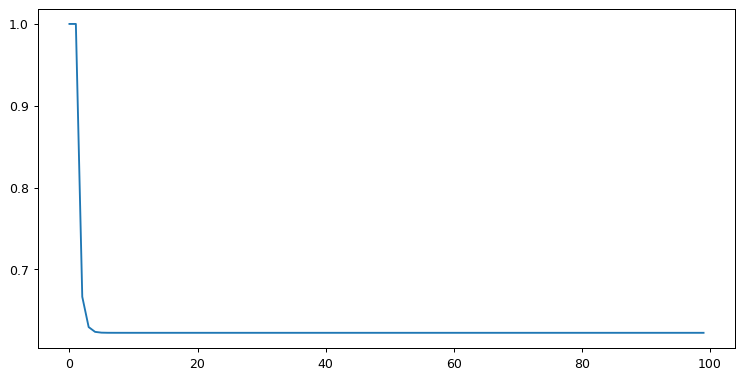

In [17]:
xk = x0
lr = lambda k: (1/6)**k
epoch = 100
found = False

dist = []

for i in range(epoch):
    tmp = torch.linalg.norm(b-xk)/torch.linalg.norm(b)
    dist.append(tmp)
    xk = gradient_descent(lr(i),xk,gradient_function)
    if not found and tmp <= 0.01:
        print(f'the distance is firstly smaller than 0.01 at k = {i}')
        found = True



xpoints = range(len(dist))
ypoints = dist

x_major_locator=MultipleLocator(20) 
y_major_locator=MultipleLocator(0.1) 

plt.figure(figsize=(10,5),dpi=90)
ax=plt.gca() 
ax.xaxis.set_major_locator(x_major_locator) 
ax.yaxis.set_major_locator(y_major_locator) 



plt.plot(xpoints,dist)
plt.show()

In [18]:
np.argmin(dist), np.min(dist)

(10, 0.6226448)

In [19]:
dist[-1]

tensor(0.6226)

As we can see, for learning rate = $(1/6)^k$, the distance is never smaller than 0.01 for 100 steps. And it also does not converge to the optimal solution.

# p2.7

the distance is firstly smaller than 0.01 at k = 3183


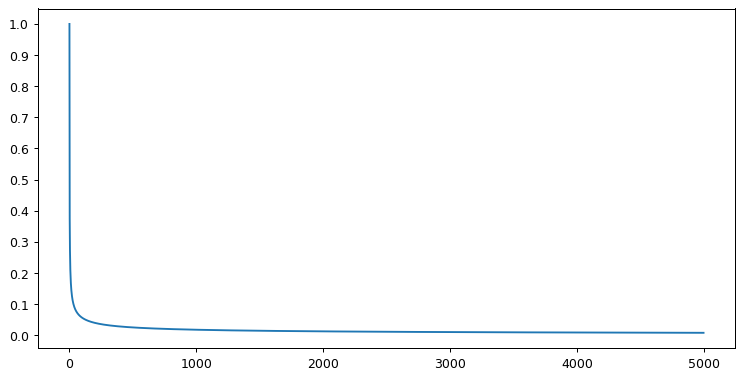

In [20]:
xk = x0
lr = lambda k: 1/(4*(k+1))
epoch = 5000
found = False

dist = []

for i in range(epoch):
    tmp = torch.linalg.norm(b-xk)/torch.linalg.norm(b)
    dist.append(tmp)
    xk = gradient_descent(lr(i),xk,gradient_function)
    if not found and tmp <= 0.01:
        print(f'the distance is firstly smaller than 0.01 at k = {i}')
        found = True



xpoints = range(len(dist))
ypoints = dist

x_major_locator=MultipleLocator(1000) 
y_major_locator=MultipleLocator(0.1) 

plt.figure(figsize=(10,5),dpi=90)
ax=plt.gca() 
ax.xaxis.set_major_locator(x_major_locator) 
ax.yaxis.set_major_locator(y_major_locator) 



plt.plot(xpoints,dist)
plt.show()

In [21]:
np.argmin(dist), np.min(dist)

(4999, 0.007979202)

As we can see, for stepsize = $1 /(4(k+1))$, the distance between $x^{k}$ and $x^*$ is firstly smaller than 0.01 for $k = 3183$. And it also converges to the optimal solution.